In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN, MeanShift, SpectralClustering, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import homogeneity_completeness_v_measure
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../datasets/dermatology_database_1.csv")

In [3]:
data.shape

(366, 35)

In [4]:
data.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   erythema                             366 non-null    int64 
 1   scaling                              366 non-null    int64 
 2   definite_borders                     366 non-null    int64 
 3   itching                              366 non-null    int64 
 4   koebner_phenomenon                   366 non-null    int64 
 5   polygonal_papules                    366 non-null    int64 
 6   follicular_papules                   366 non-null    int64 
 7   oral_mucosal_involvement             366 non-null    int64 
 8   knee_and_elbow_involvement           366 non-null    int64 
 9   scalp_involvement                    366 non-null    int64 
 10  family_history                       366 non-null    int64 
 11  melanin_incontinence                 366 non-

In [6]:
# Есть буквально 8 записей, в которых "age" не int, а "?"
data = data[data["age"] != "?"]
data["age"] = data["age"].astype('int64')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   erythema                             358 non-null    int64
 1   scaling                              358 non-null    int64
 2   definite_borders                     358 non-null    int64
 3   itching                              358 non-null    int64
 4   koebner_phenomenon                   358 non-null    int64
 5   polygonal_papules                    358 non-null    int64
 6   follicular_papules                   358 non-null    int64
 7   oral_mucosal_involvement             358 non-null    int64
 8   knee_and_elbow_involvement           358 non-null    int64
 9   scalp_involvement                    358 non-null    int64
 10  family_history                       358 non-null    int64
 11  melanin_incontinence                 358 non-null    int64

In [8]:
classes = data["class"].values
classes

array([2, 1, 3, 1, 3, 2, 5, 3, 4, 4, 1, 2, 2, 1, 3, 4, 2, 1, 3, 5, 6, 2,
       5, 3, 5, 1, 6, 5, 2, 3, 1, 2, 1, 2, 3, 1, 2, 4, 1, 2, 5, 3, 4, 6,
       2, 3, 3, 4, 1, 1, 5, 1, 2, 3, 4, 2, 6, 1, 5, 1, 2, 3, 1, 4, 5, 1,
       2, 6, 3, 5, 4, 2, 2, 1, 3, 5, 1, 2, 2, 2, 5, 1, 1, 3, 1, 4, 2, 2,
       5, 1, 3, 4, 2, 5, 1, 6, 2, 5, 1, 2, 2, 1, 4, 1, 3, 1, 1, 3, 5, 3,
       3, 5, 2, 3, 4, 1, 2, 5, 6, 1, 1, 2, 6, 3, 5, 4, 1, 1, 3, 5, 5, 1,
       4, 2, 3, 1, 2, 1, 1, 3, 3, 3, 2, 5, 4, 2, 2, 1, 1, 1, 5, 3, 2, 3,
       2, 2, 4, 2, 3, 6, 2, 1, 1, 3, 4, 3, 3, 1, 1, 1, 3, 1, 1, 2, 3, 3,
       1, 1, 1, 1, 6, 2, 2, 2, 2, 1, 3, 3, 3, 1, 1, 2, 3, 2, 2, 2, 5, 5,
       5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5,
       5, 5, 5, 5, 5, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 6, 6, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 6, 6, 6, 4, 4, 4,
       1, 1, 1, 1, 1, 2, 2, 4, 4, 4, 1, 1, 2, 2, 2, 3, 3, 3, 3, 1, 1, 1,
       1, 5, 5, 5, 5, 5, 3, 3, 3, 4, 1, 1, 4, 4, 4,

In [9]:
X = data.drop(["class"], axis=1).values
X

array([[ 2,  2,  0, ...,  1,  0, 55],
       [ 3,  3,  3, ...,  1,  0,  8],
       [ 2,  1,  2, ...,  2,  3, 26],
       ...,
       [ 3,  2,  2, ...,  2,  3, 28],
       [ 2,  1,  3, ...,  2,  3, 50],
       [ 3,  2,  2, ...,  3,  0, 35]], dtype=int64)

In [10]:
# Снижение размерности до 2 методом главных компонент (МГК)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print('Доля объясненной дисперсии: {}, сумма={}'.format(pca.explained_variance_ratio_, np.sum(pca.explained_variance_ratio_)))
X_pca[:10]

Доля объясненной дисперсии: [0.9066161  0.03325712], сумма=0.9398732245143053


array([[ 18.60814563,   1.33190905],
       [-28.23385659,  -2.6256571 ],
       [-10.22278846,   4.87409013],
       [  3.75556773,  -4.42809558],
       [  8.78796224,   4.49524116],
       [  4.65189621,   0.0707646 ],
       [-18.31051712,  -0.19601561],
       [ 20.77896415,   4.78546897],
       [-14.34368731,   0.74094483],
       [ -6.35266507,   0.78016963]])

In [15]:
# Снижение размерности до 2 методом t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
X_tsne[:10]

D:\JetBrains\PyCharm 2021.2.2\PycharmProjects\oad\LR10\.venv\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\JetBrains\PyCharm 2021.2.2\PycharmProjects\oad\LR10\.venv\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


array([[ 14.037951  ,  12.495811  ],
       [-17.987898  , -22.759787  ],
       [  0.8337552 , -13.31483   ],
       [  0.10911305,   7.3050904 ],
       [  9.649484  ,  -3.531445  ],
       [  6.4934645 ,   5.005024  ],
       [-13.690369  , -15.830737  ],
       [  7.5640726 ,  21.648907  ],
       [ -8.779566  , -15.009758  ],
       [ -3.284611  ,  -6.2357144 ]], dtype=float32)

[Text(0.5, 1.0, 'PCA')]

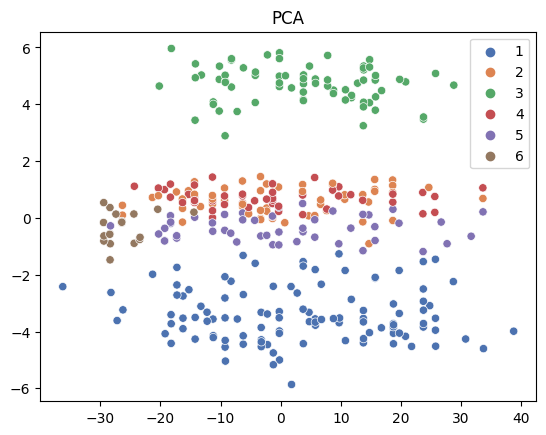

In [16]:
# Визуализация полученных выше двух датасетов
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=classes, palette="deep").set(title="PCA")

[Text(0.5, 1.0, 't-SNE')]

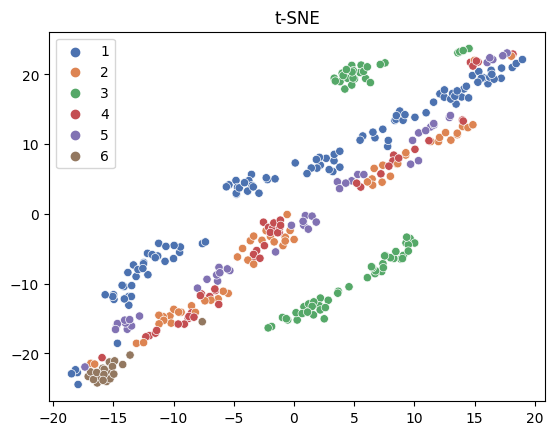

In [17]:
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=classes, palette="deep").set(title="t-SNE")

In [14]:
def claster_metrics(method, cluster_datasets, cluster_true_y, datasets_names):
    """
    Вычисление метрик кластеризации
    """
    ari = []
    ami = []
    hl = []
    cl = []
    vl = []
    sl = []
    for X_, true_y in zip(cluster_datasets, cluster_true_y):
        temp_cluster = method.fit_predict(X_)
        ari.append(adjusted_rand_score(cluster_true_y, temp_cluster))
        ami.append(adjusted_mutual_info_score(cluster_true_y, temp_cluster))
    
        h, c, v = homogeneity_completeness_v_measure(cluster_true_y, temp_cluster)
        hl.append(h)
        cl.append(c)
        vl.append(v)
    
        try:
            sscore = silhouette_score(X_, temp_cluster)
        except:
            sscore = None
            
        sl.append(sscore)
    
    result = pd.DataFrame({'Datasets':datasets_names[0:5], 
                           'ARI':ari, 'AMI':ami, 
                           'Homogeneity':hl, 
                           'Completeness':cl, 
                           'V-measure':vl, 'Silhouette':sl})
    return result

In [18]:
cluster_datasets_ = [X, X_pca, X_tsne]
datasets_names_ = ["X", "X_pca", "X_tsne"]
cluster_true_y_ = list(classes)

In [19]:
# Кластеризация с помощью KMeans
claster_metrics(KMeans(n_clusters=6), cluster_datasets_, cluster_true_y_, datasets_names_)

,Datasets,ARI,AMI,Homogeneity,Completeness,V-measure,Silhouette
0,X,0.026666,0.083526,0.104398,0.102036,0.103204,0.284282
1,X_pca,0.023652,0.081987,0.102646,0.100953,0.101792,0.424012
2,X_tsne,0.156498,0.266619,0.288691,0.275800,0.282098,0.457036


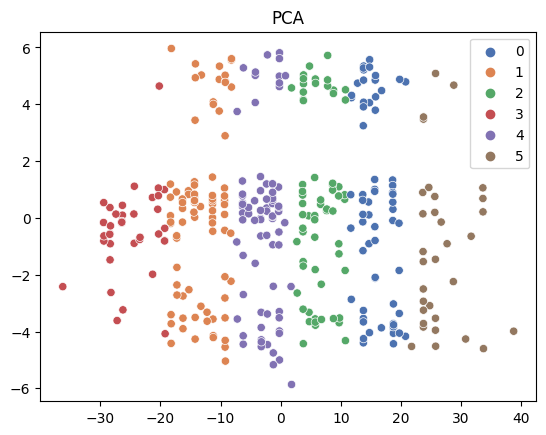

[Text(0.5, 1.0, 't-SNE')]

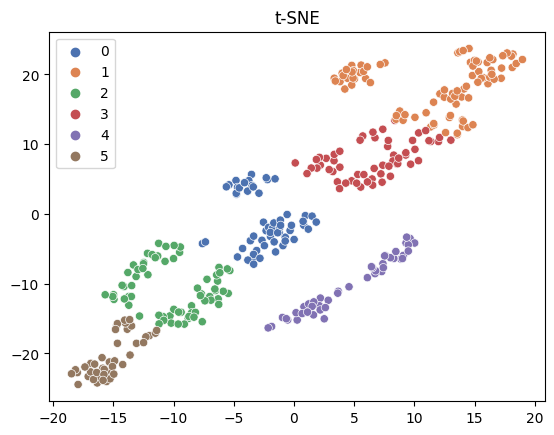

In [20]:
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=KMeans(n_clusters=6).fit_predict(X_pca), palette="deep").set(title="PCA")
plt.show()
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=KMeans(n_clusters=6).fit_predict(X_tsne), palette="deep").set(title="t-SNE")

In [21]:
# Кластеризация с помощью GaussianMixture
claster_metrics(GaussianMixture(n_components=6), cluster_datasets_, cluster_true_y_, datasets_names_)

,Datasets,ARI,AMI,Homogeneity,Completeness,V-measure,Silhouette
0,X,0.168572,0.301119,0.306855,0.327757,0.316962,-0.079582
1,X_pca,0.125826,0.207806,0.227622,0.222024,0.224788,0.143546
2,X_tsne,0.145599,0.260610,0.280661,0.272244,0.276388,0.427330


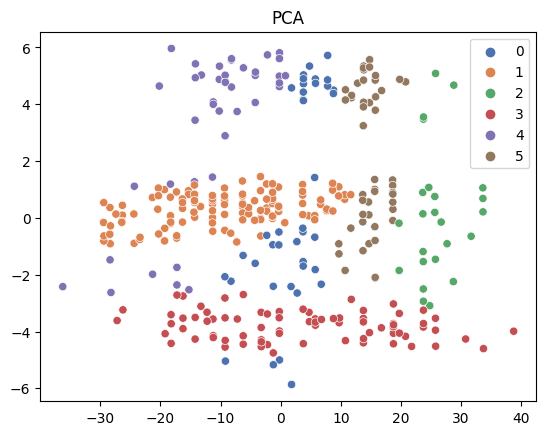

[Text(0.5, 1.0, 't-SNE')]

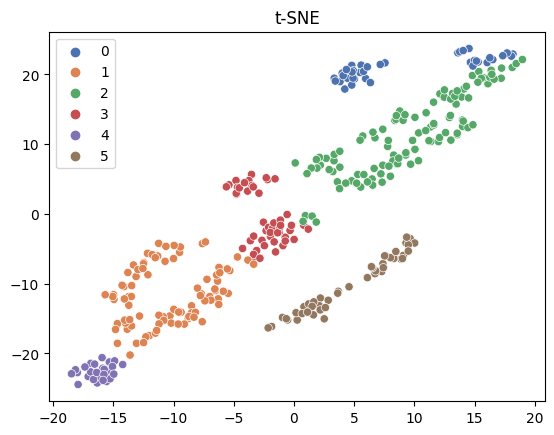

In [22]:
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=GaussianMixture(n_components=6).fit_predict(X_pca), palette="deep").set(title="PCA")
plt.show()
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=GaussianMixture(n_components=6).fit_predict(X_tsne), palette="deep").set(title="t-SNE")

In [23]:
# Кластеризация с помощью SpectralClustering
claster_metrics(SpectralClustering(n_clusters=6), cluster_datasets_, cluster_true_y_, datasets_names_)

D:\JetBrains\PyCharm 2021.2.2\PycharmProjects\oad\LR10\.venv\lib\site-packages\sklearn\manifold\_spectral_embedding.py:374: UserWarning: Exited at iteration 2000 with accuracies 
[5.73623185e-15 3.04956880e-06 3.05371547e-06 6.78366909e-06
 1.15618018e-05 6.46213819e-06 3.98010223e-05]
not reaching the requested tolerance 1e-05.
  _, diffusion_map = lobpcg(


,Datasets,ARI,AMI,Homogeneity,Completeness,V-measure,Silhouette
0,X,-0.002319,0.011501,0.024653,0.212577,0.044182,0.054043
1,X_pca,0.125053,0.260543,0.242303,0.328067,0.278737,0.187579
2,X_tsne,0.179850,0.364113,0.363711,0.395198,0.378801,0.354215


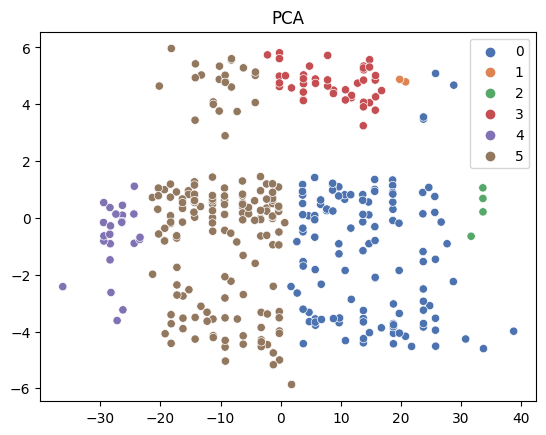

[Text(0.5, 1.0, 't-SNE')]

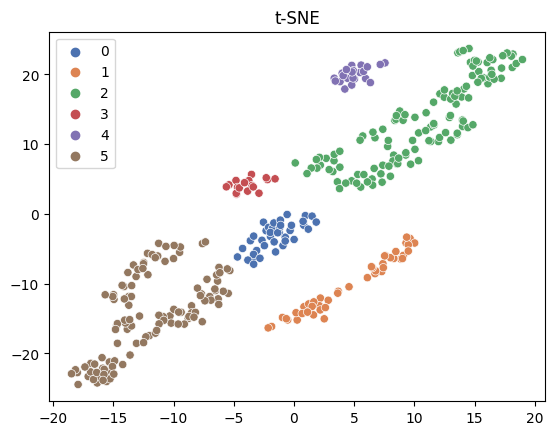

In [24]:
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=SpectralClustering(n_clusters=6).fit_predict(X_pca), palette="deep").set(title="PCA")
plt.show()
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=SpectralClustering(n_clusters=6).fit_predict(X_tsne), palette="deep").set(title="t-SNE")

In [25]:
# Кластеризация с помощью AgglomerativeClustering
claster_metrics(AgglomerativeClustering(n_clusters=6), cluster_datasets_, cluster_true_y_, datasets_names_)

,Datasets,ARI,AMI,Homogeneity,Completeness,V-measure,Silhouette
0,X,0.031376,0.088739,0.109045,0.107913,0.108476,0.252873
1,X_pca,0.045285,0.110836,0.130421,0.129889,0.130155,0.393096
2,X_tsne,0.147999,0.271787,0.289578,0.285476,0.287513,0.454462


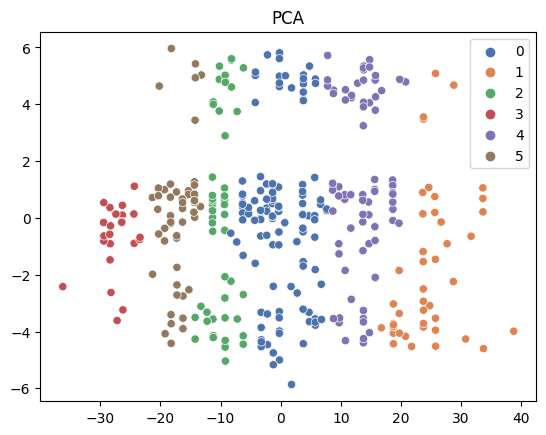

[Text(0.5, 1.0, 't-SNE')]

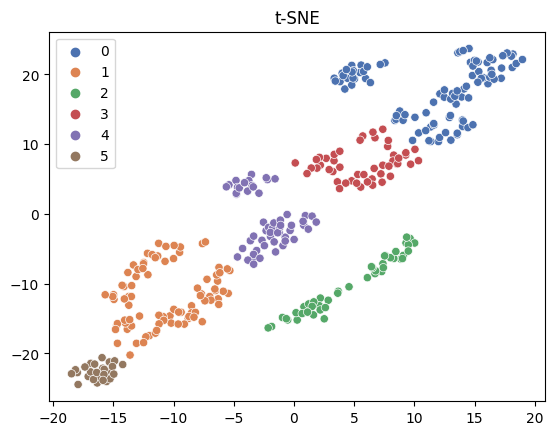

In [26]:
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=AgglomerativeClustering(n_clusters=6).fit_predict(X_pca), palette="deep").set(title="PCA")
plt.show()
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=AgglomerativeClustering(n_clusters=6).fit_predict(X_tsne), palette="deep").set(title="t-SNE")
